In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
import pickle
import xgboost
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('traffic volume.csv')

In [3]:
data

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,NaN,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,NaN,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,NaN,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB
None


In [67]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


In [68]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [69]:
data.shape

(48204, 8)

In [70]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [71]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [73]:
data['weather'].value_counts()


weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [74]:
data['temp'] = data['temp'].fillna(data['temp'].mean())
data['rain'] = data['rain'].fillna(data['rain'].mean())
data['snow'] = data['snow'].fillna(data['snow'].mean())


In [75]:
print(data['weather'].value_counts())

weather
Clouds          15144
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [76]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\saisa\AppData\Local\Temp\ipykernel_17240\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [77]:
data['weather'] = data['weather'].replace('Clouds', 1.0)
print(data['weather'].value_counts())


weather
1.0             15193
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [78]:
print(data['weather'].value_counts())
data['weather'] = data['weather'].fillna(1)
data['weather'].fillna('Clouds',inplace=True)

weather
1.0             15193
Clear           13383
Mist             5942
Rain             5665
Snow             2875
Drizzle          1818
Haze             1359
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


C:\Users\saisa\AppData\Local\Temp\ipykernel_17240\3517850937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [79]:
# prompt: print NaN in holiday column to 0

data['holiday'].fillna(0, inplace=True)


C:\Users\saisa\AppData\Local\Temp\ipykernel_17240\821408972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna(0, inplace=True)


In [80]:
print(data.head())

  holiday    temp  rain  snow weather        date      Time  traffic_volume
0       0  288.28   0.0   0.0     1.0  02-10-2012  09:00:00            5545
1       0  289.36   0.0   0.0     1.0  02-10-2012  10:00:00            4516
2       0  289.58   0.0   0.0     1.0  02-10-2012  11:00:00            4767
3       0  290.13   0.0   0.0     1.0  02-10-2012  12:00:00            5026
4       0  291.14   0.0   0.0     1.0  02-10-2012  13:00:00            4918


In [81]:
print(data.columns)


Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time',
       'traffic_volume'],
      dtype='object')


<Axes: ylabel='temp'>

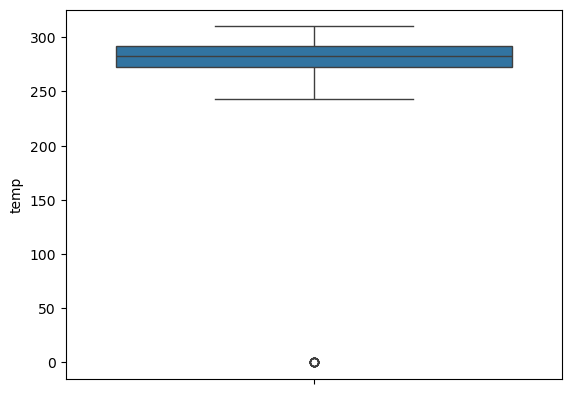

In [82]:
import seaborn as sns
sns.boxplot(data=data['temp'])

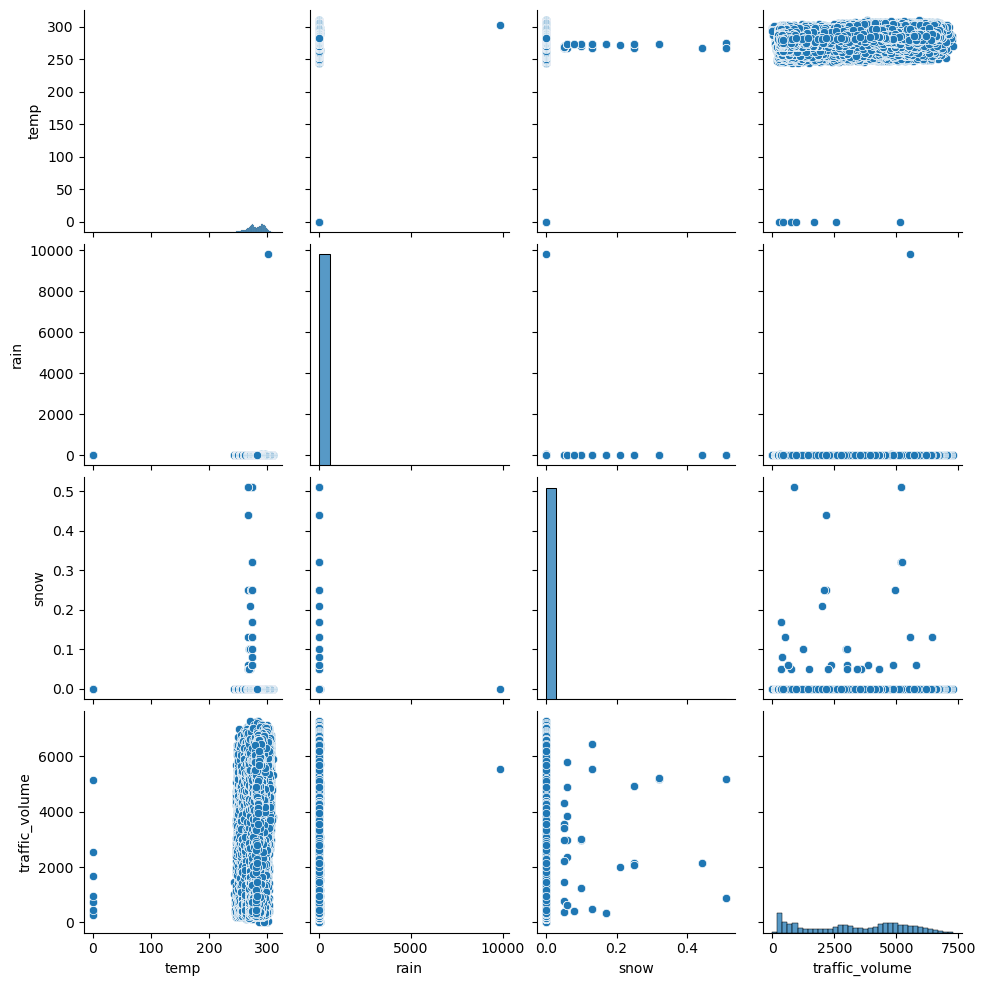

In [83]:
sns.pairplot(data)

<Axes: xlabel='count', ylabel='weather'>

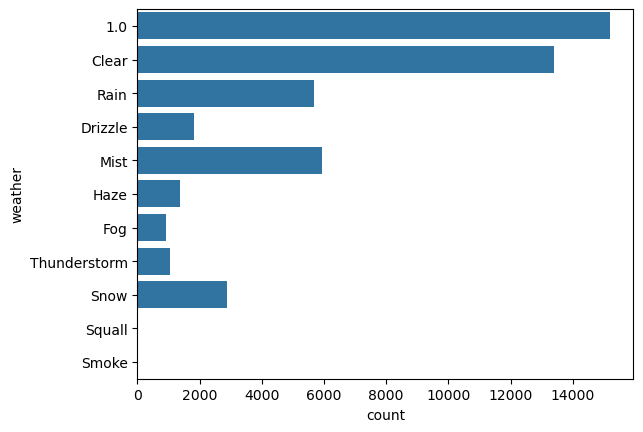

In [84]:
sns.countplot(data['weather'])

<Axes: ylabel='traffic_volume'>

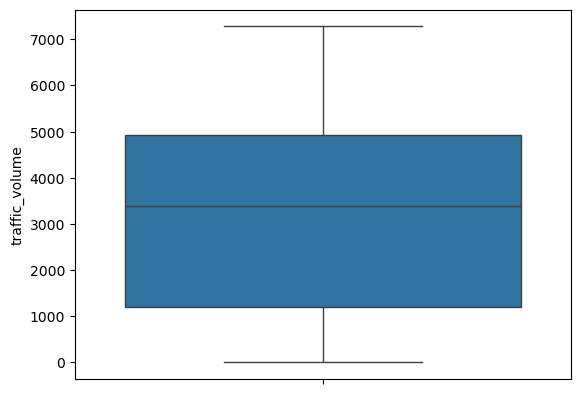

In [5]:
sns.boxplot(data['traffic_volume'])

<Axes: >

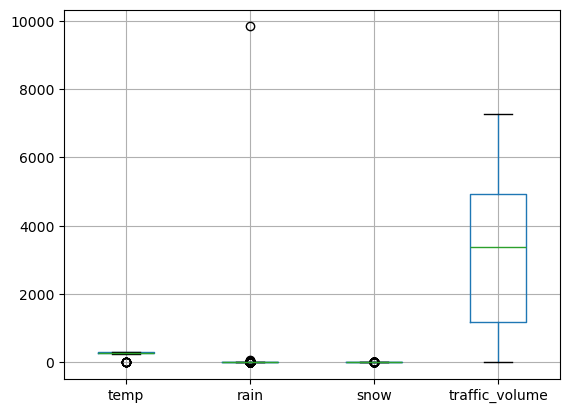

In [85]:
data.boxplot()

In [86]:
plt.show()

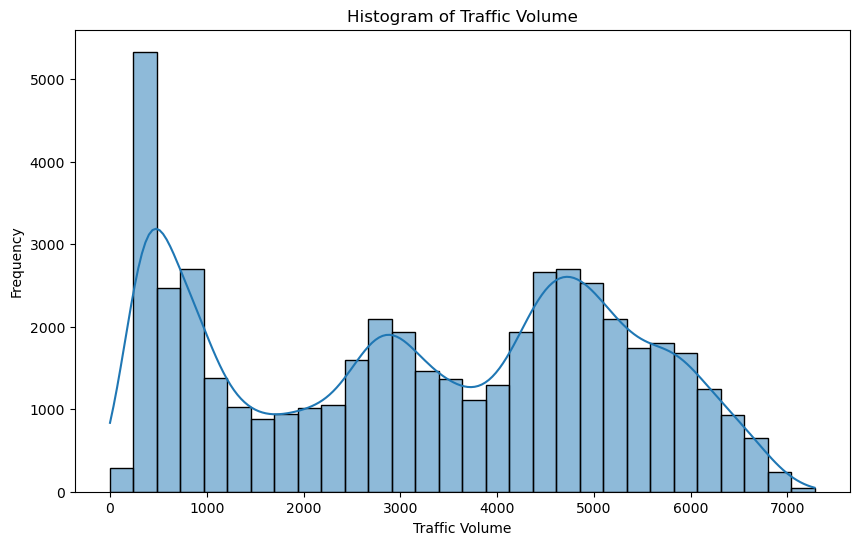

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(data['traffic_volume'], bins=30, kde=True)
plt.title('Histogram of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [88]:
numeric_df = data.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr

,temp,rain,snow,traffic_volume
temp,1.000000,0.009069,-0.019760,0.130051
rain,0.009069,1.000000,-0.000090,0.004714
snow,-0.019760,-0.000090,1.000000,0.000733
traffic_volume,0.130051,0.004714,0.000733,1.000000


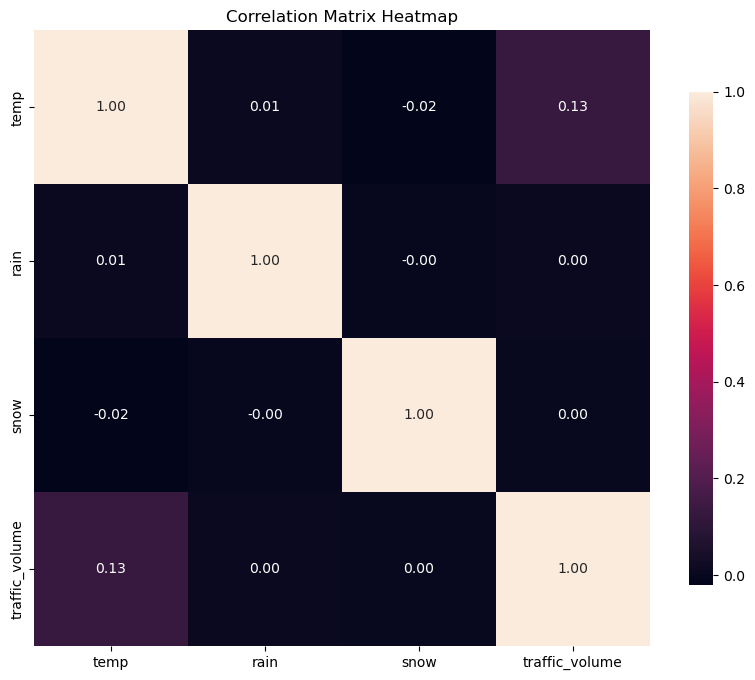

In [89]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [90]:
print(data.columns.tolist())

['holiday', 'temp', 'rain', 'snow', 'weather', 'date', 'Time', 'traffic_volume']


In [91]:
data[["day","month","year"]] = data["date"].str.split("-", expand=True)
data[["hours","minutes","seconds"]] = data["Time"].str.split(":", expand=True)
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [92]:
print(data.head())

  holiday    temp  rain  snow weather  traffic_volume day month  year hours  \
0       0  288.28   0.0   0.0     1.0            5545  02    10  2012    09   
1       0  289.36   0.0   0.0     1.0            4516  02    10  2012    10   
2       0  289.58   0.0   0.0     1.0            4767  02    10  2012    11   
3       0  290.13   0.0   0.0     1.0            5026  02    10  2012    12   
4       0  291.14   0.0   0.0     1.0            4918  02    10  2012    13   

  minutes seconds  
0      00      00  
1      00      00  
2      00      00  
3      00      00  
4      00      00  


In [93]:
print(data.columns)

Index(['holiday', 'temp', 'rain', 'snow', 'weather', 'traffic_volume', 'day',
       'month', 'year', 'hours', 'minutes', 'seconds'],
      dtype='object')


In [94]:
data['weather'] = data['weather'].astype(str)

In [95]:
le = LabelEncoder()

In [96]:
le.fit(data['weather'])

LabelEncoder()

In [97]:
#splitting into independant and dependant variables
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)
x['holiday'] = le.fit_transform(x['holiday'].astype(str))
x['weather'] = le.fit_transform(x['weather'].astype(str))



In [98]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,0,288.28,0.0,0.0,1.0,5545,02,10,2012,09,00,00
1,0,289.36,0.0,0.0,1.0,4516,02,10,2012,10,00,00
2,0,289.58,0.0,0.0,1.0,4767,02,10,2012,11,00,00
3,0,290.13,0.0,0.0,1.0,5026,02,10,2012,12,00,00
4,0,291.14,0.0,0.0,1.0,4918,02,10,2012,13,00,00


#Feature Scaling

In [99]:
feature_names = x.columns
names=x.columns
x=scale(x)
x=pd.DataFrame(x,columns=names)
print(x.head())

    holiday      temp      rain      snow   weather       day    month  \
0 -0.031467  0.530379 -0.007463 -0.027228 -0.903263 -1.574903  1.02758   
1 -0.031467  0.611361 -0.007463 -0.027228 -0.903263 -1.574903  1.02758   
2 -0.031467  0.627857 -0.007463 -0.027228 -0.903263 -1.574903  1.02758   
3 -0.031467  0.669098 -0.007463 -0.027228 -0.903263 -1.574903  1.02758   
4 -0.031467  0.744832 -0.007463 -0.027228 -0.903263 -1.574903  1.02758   

       year     hours  minutes  seconds  
0 -1.855294 -0.345548      0.0      0.0  
1 -1.855294 -0.201459      0.0      0.0  
2 -1.855294 -0.057371      0.0      0.0  
3 -1.855294  0.086718      0.0      0.0  
4 -1.855294  0.230807      0.0      0.0  


In [100]:
from sklearn import preprocessing 

In [101]:
label_encoder = preprocessing.LabelEncoder()

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=feature_names)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [104]:
lin_reg = linear_model. LinearRegression()
Dtree = tree. DecisionTreeRegressor()
Rand = ensemble. RandomForestRegressor()
svr = svm. SVR( )
XGB = xgboost . XGBRegressor ()

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38563, 11)
(9641, 11)
(38563,)
(9641,)


In [106]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [108]:
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics. r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics. r2_score(p4,y_train))
print(metrics. r2_score(p5, y_train))

-5.472535413028158
1.0
0.9756362897947136
-12.320314642857845
0.8469192209869841


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np


In [110]:

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    print("Regression Report:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R² Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")

In [111]:
p1 = lin_reg.predict(x_test)
regression_report(y_test,p1)

Regression Report:
Mean Absolute Error: 1636.2917687816025
Mean Squared Error: 3396347.4025021424
Root Mean Squared Error: 1842.9181757479473
R² Score: 0.14092936529824218
Explained Variance Score: 0.1409820946135063


In [112]:
p2 = Dtree.predict(x_test)
regression_report(y_test,p2)

Regression Report:
Mean Absolute Error: 553.5173737164195
Mean Squared Error: 1096063.0566331293
Root Mean Squared Error: 1046.9303017073912
R² Score: 0.7227622872026334
Explained Variance Score: 0.7228224648806498


In [113]:

p3 = Rand.predict(x_test)
regression_report(y_test,p3)

Regression Report:
Mean Absolute Error: 493.6838813401099
Mean Squared Error: 610686.3171561249
Root Mean Squared Error: 781.4642136119381
R² Score: 0.8455332685647843
Explained Variance Score: 0.8456590481304482


In [114]:
p4 = svr.predict(x_test)
regression_report(y_test,p4)

Regression Report:
Mean Absolute Error: 1514.4397776051203
Mean Squared Error: 2997923.7415386634
Root Mean Squared Error: 1731.4513396392817
R² Score: 0.24170647280259672
Explained Variance Score: 0.2435684593747267


In [115]:
p5 = XGB.predict(x_test)
regression_report(y_test,p5)

Regression Report:
Mean Absolute Error: 527.3010232711454
Mean Squared Error: 628595.9247982444
Root Mean Squared Error: 792.8404157194841
R² Score: 0.841003220197812
Explained Variance Score: 0.8410340833901695


In [120]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [146]:
rf = RandomForestRegressor()
param_random_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [122]:
randomized_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_random_rf, n_iter=50, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
randomized_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error', verbose=2)

In [123]:
best_rf = randomized_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = metrics.r2_score(y_pred_rf, y_test)

In [124]:
print("Best parameters for Random Forest:", randomized_search_rf.best_params_)
print("Random Forest Test set MSE:", mse_rf)
print("R2 score after tunning : " , r2_rf)

Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest Test set MSE: 611318.5661813644
R2 score after tunning :  0.8120972812517622


In [125]:
svr = SVR()
param_random_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf'],
}

In [130]:
random_search_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_random_svr,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_svr.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'epsilon': [0.1, 0.2, 0.5],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [131]:
best_svr = random_search_svr.best_estimator_
y_pred_svr = best_svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = metrics.r2_score(y_pred_svr, y_test)

In [132]:
print("Best parameters for SVR:", random_search_svr.best_params_)
print("SVR Test set MSE:", mse_svr)
print("R2 score after tunning : " , r2_svr)

Best parameters for SVR: {'kernel': 'rbf', 'epsilon': 0.5, 'C': 10}
SVR Test set MSE: 1581673.1045859398
R2 score after tunning :  -0.10182765719494768


In [133]:
xgb = XGBRegressor()
param_random_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [134]:
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions = param_random_xgb,n_iter=50,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\saisa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [135]:
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = metrics.r2_score(y_pred_xgb, y_test)

In [136]:
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("XGBoost Test set MSE:", mse_xgb)
print("R2 score after tunning : " , r2_xgb)

Best parameters for XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
XGBoost Test set MSE: 534993.0344943126
R2 score after tunning :  0.8405261148959617


In [137]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [140]:
y_pred_linear = linear_reg.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = metrics.r2_score(y_pred_linear, y_test)

print("Linear Regression Test set MSE:", mse_linear)
print("R2 score after tunning : " , r2_linear)

Linear Regression Test set MSE: 3396347.4025021424
R2 score after tunning :  -5.431530418573976


In [141]:
dt = DecisionTreeRegressor()
param_random_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [142]:
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_random_dt,n_iter=50,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
random_search_dt.fit(x_train, y_train)

c:\Users\saisa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_squared_error', verbose=2)

In [143]:
best_dt = random_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = metrics.r2_score(y_pred_dt, y_test)

In [144]:
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Decision Tree Test set MSE:", mse_dt)
print("R2 score after tunning : " , r2_dt)

Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree Test set MSE: 834649.5839893497
R2 score after tunning :  0.7379026129421835


In [145]:
#linear regression
regression_report(y_test,y_pred_linear)

Regression Report:
Mean Absolute Error: 1636.2917687816025
Mean Squared Error: 3396347.4025021424
Root Mean Squared Error: 1842.9181757479473
R² Score: 0.14092936529824218
Explained Variance Score: 0.1409820946135063


In [147]:
#desicion tree
regression_report(y_test,y_pred_dt)

Regression Report:
Mean Absolute Error: 603.994188573295
Mean Squared Error: 834649.5839893497
Root Mean Squared Error: 913.5915848941198
R² Score: 0.7888840972678335
Explained Variance Score: 0.7889080572908945


In [148]:
#random forest regression
regression_report(y_test,y_pred_rf)

Regression Report:
Mean Absolute Error: 494.55865435812325
Mean Squared Error: 611318.5661813644
Root Mean Squared Error: 781.8686374202282
R² Score: 0.8453733477713454
Explained Variance Score: 0.8454733422423539


In [149]:
#svr
regression_report(y_test,y_pred_svr)

Regression Report:
Mean Absolute Error: 982.2159131619221
Mean Squared Error: 1581673.1045859398
Root Mean Squared Error: 1257.64585817548
R² Score: 0.5999322928960928
Explained Variance Score: 0.604402149108233


In [150]:
#xgb
regression_report(y_test,y_pred_xgb)

Regression Report:
Mean Absolute Error: 474.40938132787414
Mean Squared Error: 534993.0344943126
Root Mean Squared Error: 731.4321803792287
R² Score: 0.8646790945574483
Explained Variance Score: 0.8646957455194769


In [151]:
import pickle
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(scaler, open("scale.pkl", 'wb'))